### Imports

In [17]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
def interpret_confusion_matrix(matrix, title, labels):
    encode, correct, errors, total = [],[],[],[]
    i=0
    for row in matrix:
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),cells=dict(values=[labels, correct, errors, total]))])
    fig.update_layout(title= title,width=650,height=400)

    fig.show()
    pio.write_image(fig, f"Graphs/Perceptron/{title}.png", format='png')



labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

df = pd.read_csv("data/DataEncoded.csv")

### Train Test Split

In [18]:
X = df.drop(["NObeyesdad"], axis=1)
Y = df["NObeyesdad"]

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Single Layer Perceptron

Cross Validation Score: 0.3688751033912324
Precision Score: 0.8575299486872021
Recall Score: 0.2603092783505155
F1 score: 0.21136990588796015
Accuracy: 0.2603092783505155


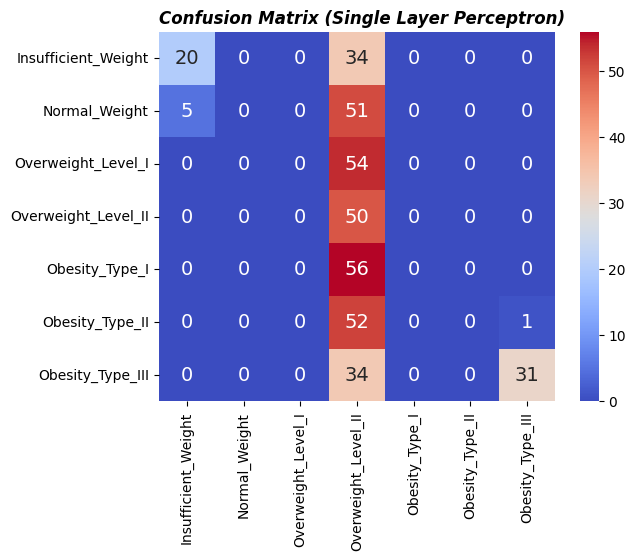

In [19]:
clf = Perceptron(random_state=42)
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)


cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted", zero_division=1)
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Single Layer Perceptron)",loc='left', fontweight='bold',  style='italic')
plt.savefig('Graphs/Perceptron/Confusion Matrix (Single Layer Perceptron).png', bbox_inches='tight')
plt.show()


interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Single Layer Perceptron", labels)

### Multi Layer Perceptron

#### Stochastic Gradient Descent

Cross Validation Score: 0.6396153846153846
Precision Score: 0.6054371090408768
Recall Score: 0.5644329896907216
F1 score: 0.5203764916604371
Accuracy: 0.5644329896907216


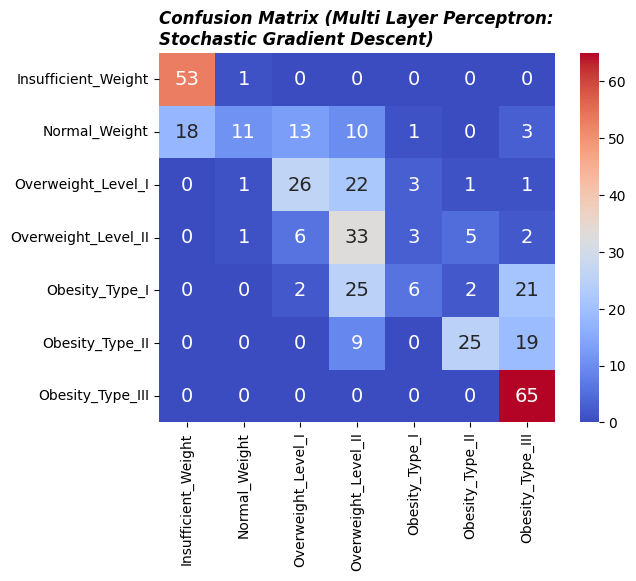

In [20]:
clf = MLPClassifier(solver="sgd", random_state=42, max_iter=1000)
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Multi Layer Perceptron: \nStochastic Gradient Descent)",loc='left', fontweight='bold',  style='italic')
plt.savefig("Graphs/Perceptron/Confusion Matrix (Multi Layer Perceptron - Stochastic Gradient Descent).png", bbox_inches='tight')
plt.show()


interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Multi Layer Perceptron → Stochastic Gradient Descent", labels)



#### Adam's Gradient Descent

Cross Validation Score: 0.8175227460711332
Precision Score: 0.8529222654887855
Recall Score: 0.8556701030927835
F1 score: 0.8523355921963754
Accuracy: 0.8556701030927835


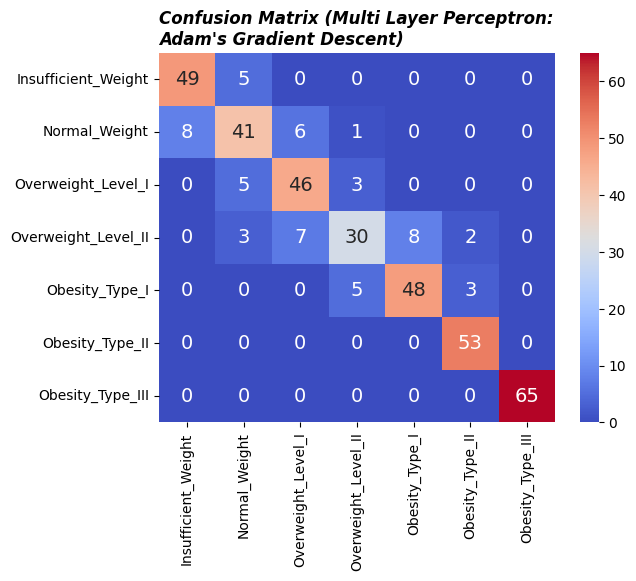

In [21]:
clf = MLPClassifier(solver="adam", random_state=42, max_iter=1000)
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Multi Layer Perceptron: \nAdam's Gradient Descent)",loc='left', fontweight='bold',  style='italic')
plt.savefig("Graphs/Perceptron/Confusion Matrix (Multi Layer Perceptron - Adam's Gradient Descent).png", bbox_inches='tight')
plt.show()


interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Multi Layer Perceptron → Adam's Gradient Descent", labels)

